In [ ]:
# 1) Imports & installation checks
import numpy as np
from discretize import TensorMesh, TreeMesh
import discretize
from mesh_viewer import TreeMeshViewer, create_mesh_viewer


In [2]:
hx = np.ones(20)
hy = np.ones(20)
hz = np.ones(20)
mesh = TensorMesh([hx, hy, hz], x0="CCC")  # origin at (0,0,0)

# 3) Create a “half-space” model: all cells = 1.0
model = np.ones(mesh.n_cells)

# Add a high-conductivity layer
model[mesh.gridCC[:, 2] < -1.0] = 10.0  # Deep layer

# Add some heterogeneity
model[(mesh.gridCC[:, 0] > 0) & (mesh.gridCC[:, 2] > -0.5)] = 0.1  # Resistive block
mesh

TensorMesh: 8,000 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x     20        -10.00         10.00      1.00      1.00    1.00
   y     20        -10.00         10.00      1.00      1.00    1.00
   z     20        -10.00         10.00      1.00      1.00    1.00

In [3]:
#Octree mesh example
mesh = TreeMesh.read_UBC("large_octree_mesh.txt")
mesh

OcTreeMesh,0.29% filled
Level,Number of cells
3,48
4,292
5,2069
6,3766
7,7903
8,35647
9,136611
10,582952
Total,769288


In [4]:
# create halfspace model
model = 1e-8 * np.ones(mesh.n_cells)
model[mesh.gridCC[:, 2] < 0] = 0.0001  # Resistive bottom layer
#add conductive layer between -100 and 0
model[(mesh.gridCC[:, 2] < 0) & (mesh.gridCC[:, 2] > -1000)] = 10.0  # Conductive layer
print(f"Model range: {model.min():.8f} to {model.max():.8f}")


Model range: 0.00000001 to 10.00000000


<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_968950/387453281.py:23: SyntaxWarning: invalid escape sequence '\s'
  cbar.set_label("$\sigma$ [S/m]", rotation=270, labelpad=15, size=16)


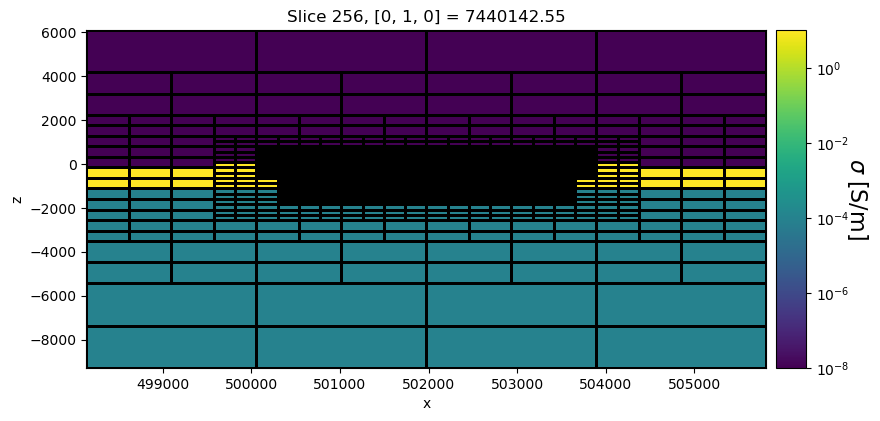

In [5]:
import matplotlib.pyplot as plt
from matplotlib import colorbar
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(10, 4.5))
norm = LogNorm(vmin=1e-8, vmax=10)

ax1 = fig.add_axes([0.15, 0.15, 0.68, 0.75])
mesh.plot_slice(
    (model),
    ax=ax1,
    normal="y",
    ind=int(len(mesh.h[0]) / 2),
    grid=True,
    pcolor_opts={"norm": norm},
)

#ax1.set_title("Initial Parametric Model")

ax2 = fig.add_axes([0.84, 0.15, 0.03, 0.75])
cbar = colorbar.ColorbarBase(
    ax2, norm=norm, orientation="vertical"
)
cbar.set_label("$\sigma$ [S/m]", rotation=270, labelpad=15, size=16)


In [ ]:
# Mesh Viewer 
create_mesh_viewer(mesh, model, cmap="viridis", log_scale=True).show()


Output()